In [3]:
import tensorflow as tf
import keras
import pickle
import gzip
import numpy as np
import pandas as pd
import statistics
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import os,random
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, SeparableConv2D
from keras.regularizers import *
from keras.layers import add
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

In [4]:


with open('dataset.pkl','rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(p[mod,snr])
        for i in range(p[(mod,snr)].shape[0]): lbl.append((mod,snr))
X = np.vstack(X)

label=[]
mod=[]
data=[]
for i in range(len(lbl)):
        label.append(lbl[i][0])
        mod.append(lbl[i][1])
        data.append(X[i])

arr = np.array([label,mod,data])
arr_2 = []
for i in range(len(label)):
    arr_2.append([arr[0][i], arr[1][i], arr[2][i]])

C:\Users\megha\AppData\Local\Temp\ipykernel_15348\759383135.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array([label,mod,data])


In [5]:
dataset = pd.DataFrame(arr_2, columns = ['Modulation Type', 'SNR', 'Values'])
dataset = dataset.set_index('Modulation Type')

In [6]:
dataset = dataset.drop('WBFM', axis = 0)
dataset = dataset.drop('QPSK', axis = 0)
dataset = dataset.drop('AM-DSB', axis = 0)
dataset = dataset.drop('AM-SSB', axis = 0)
dataset = dataset.drop('CPFSK', axis = 0)

In [7]:
dataset = dataset.reset_index()

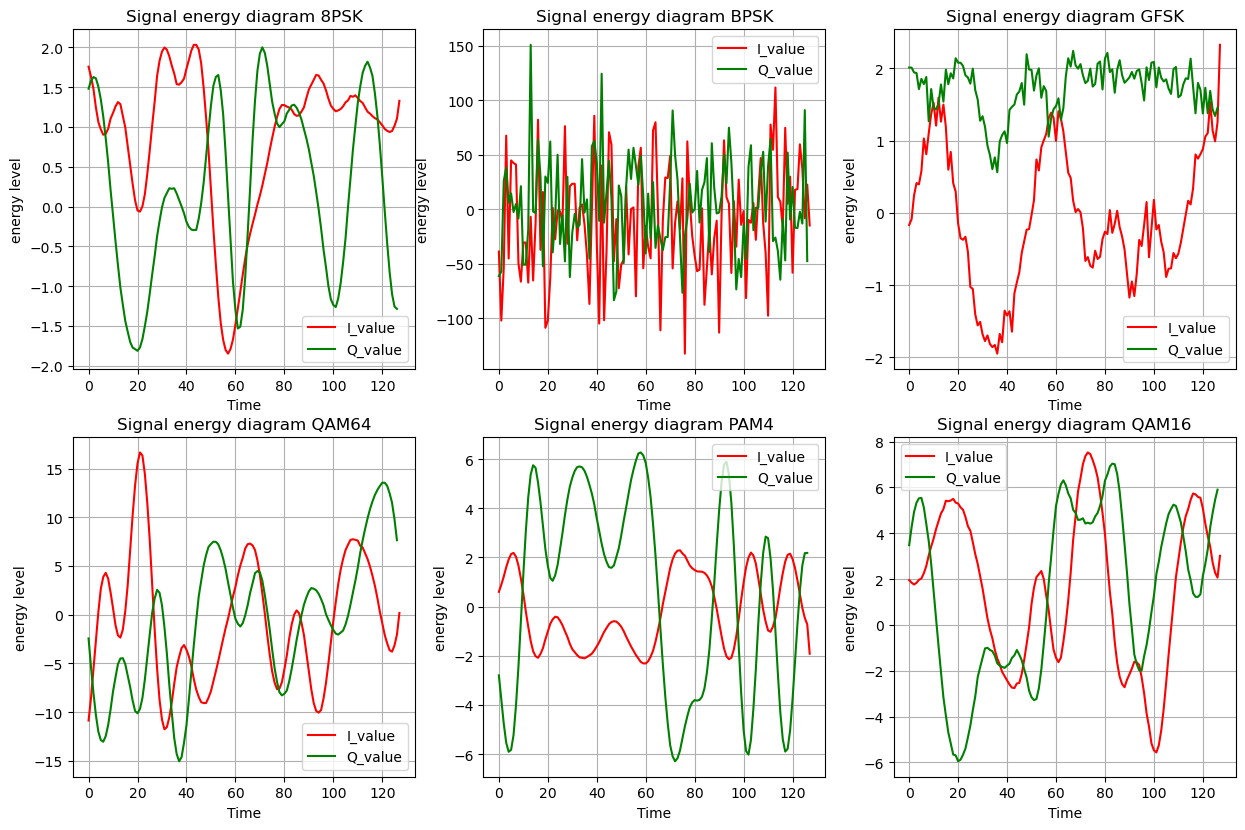

In [8]:
m1 = 8000
X1 = dataset.iat[m1,2]
X2 = dataset.iat[m1,0]
X1 = X1.flatten()

m2 = 10000
X3 = dataset.iat[m2,2]
X4 = dataset.iat[m2,0]
X3 = X3.flatten()

m3 = 50000
X5 = dataset.iat[m3,2]
X6 = dataset.iat[m3,0]
X5 = X5.flatten()

m4 = 80000
X7 = dataset.iat[m4,2]
X8 = dataset.iat[m4,0]
X7 = X7.flatten()

m5 = 69500
X9 = dataset.iat[m5,2]
X10 = dataset.iat[m5,0]
X9 = X9.flatten()

m6 = 75500
X11 = dataset.iat[m6,2]
X12 = dataset.iat[m6,0]
X11 = X11.flatten()

plt.figure(figsize = (15,15))

plt.subplot(331)
# visualizing the results
plt.plot(X1[1:129], color = 'red', label = 'I_value')
plt.plot(X1[129:256], color = 'green', label = 'Q_value')
plt.title(f"Signal energy diagram {X2}")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.grid()
plt.legend()

plt.subplot(332)
# visualizing the results
plt.plot(X3[1:129], color = 'red', label = 'I_value')
plt.plot(X3[129:256], color = 'green', label = 'Q_value')
plt.title(f"Signal energy diagram {X4}")
plt.xlabel('Time')
plt.grid()
plt.ylabel('energy level')
plt.legend()

plt.subplot(333)
# visualizing the results
plt.plot(X5[1:129], color = 'red', label = 'I_value')
plt.plot(X5[129:256], color = 'green', label = 'Q_value')
plt.title(f"Signal energy diagram {X6}")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.grid()
plt.legend()

plt.subplot(334)
# visualizing the results
plt.plot(X7[1:129], color = 'red', label = 'I_value')
plt.plot(X7[129:256], color = 'green', label = 'Q_value')
plt.title(f"Signal energy diagram {X8}")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.grid()
plt.legend()

plt.subplot(335)
# visualizing the results
plt.plot(X9[1:129], color = 'red', label = 'I_value')
plt.plot(X9[129:256], color = 'green', label = 'Q_value')
plt.title(f"Signal energy diagram {X10}")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.grid()
plt.legend()

plt.subplot(336)
# visualizing the results
plt.plot(X11[1:129], color = 'red', label = 'I_value')
plt.plot(X11[129:256], color = 'green', label = 'Q_value')
plt.title(f"Signal energy diagram {X12}")
plt.xlabel('Time')
plt.ylabel('energy level')
plt.grid()
plt.legend()

In [9]:
def gaussian_noise(mu,sigma): 
    noise = np.random.normal(mu, sigma, [2,128]) 
    return noise

def noise_added(signal, Gnoise):
    signal = signal + Gnoise
    return signal

def sd_calc(data):
    meanValue = statistics.mean(data)
    var = statistics.variance(data, meanValue)
    sd = math.sqrt(var)
    return sd

In [10]:
array_noisesignal = []
noise_signal = []
for i in range(len(dataset)):
    temp = dataset.iat[i,2]
    std = sd_calc(temp[0])
    n1 = gaussian_noise(0, std)
    noise_signal.append(n1)
    final = noise_added(temp, n1)
    array_noisesignal.append(final)

array_noisesignal = np.array(array_noisesignal)
noise_signal = np.array(noise_signal)
dataset_2 = dataset.copy()

dataset['data'] = array_noisesignal.tolist()
dataset_2['noise'] = noise_signal.tolist()
dataset = dataset.drop(columns = ['Values'])
dataset_2 = dataset_2.drop(columns = ['Values'])

labels_noise = np.zeros([80900,1])
labels_signal = np.ones([80900,1])

dataset['labels'] = labels_noise.tolist()
dataset_2['labels'] = labels_signal.tolist()

dataset['labels'] = labels_noise.astype('int64')
dataset_2['labels'] = labels_signal.astype('int64')

dataset_2.columns = dataset.columns
df = pd.concat([dataset, dataset_2], ignore_index=True)

In [11]:
dataset

,Modulation Type,SNR,data,labels
0,8PSK,-20,"[[78.93999850156334, 41.19339081232751, 120.65...",0
1,8PSK,-20,"[[74.66134277640616, 116.83709103525001, -133....",0
2,8PSK,-20,"[[136.85053348191192, 51.35831768358133, 108.1...",0
3,8PSK,-20,"[[133.40244609949895, -40.032705150409, -123.9...",0
4,8PSK,-20,"[[-125.99048130975461, -194.54882364034685, -1...",0
...,...,...,...,...
80895,QAM64,18,"[[-13.460774919990081, -3.0007594812306984, -1...",0
80896,QAM64,18,"[[15.908683371214513, 12.929795740393315, 14.7...",0
80897,QAM64,18,"[[13.737067102442445, 12.546199298770016, -0.9...",0
80898,QAM64,18,"[[0.904249404045296, -4.346947590759527, 2.712...",0


In [12]:
dataset_2

,Modulation Type,SNR,data,labels
0,8PSK,-20,"[[54.22543513181237, 70.7620343822738, 27.9767...",1
1,8PSK,-20,"[[82.08567253409659, -2.971159391996082, -21.8...",1
2,8PSK,-20,"[[-3.4110479389865196, 106.66382152879618, 16....",1
3,8PSK,-20,"[[73.93589336512396, 18.716768421368343, -60.3...",1
4,8PSK,-20,"[[-107.85361569390989, -107.56180124044451, -1...",1
...,...,...,...,...
80895,QAM64,18,"[[-1.0132985329661557, 9.117969156464614, -3.0...",1
80896,QAM64,18,"[[2.864368033079747, 0.20910119846216246, 3.06...",1
80897,QAM64,18,"[[0.8616083850962533, 0.06585452643115007, -12...",1
80898,QAM64,18,"[[3.9782790881120684, -0.030912320068608678, 8...",1


In [10]:
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
y = list(df['labels'])
X = df['data']

np.random.seed(258)
n_examples = X.shape[0]
n_train = n_examples * 0.75
train_idx = np.random.choice(range(0,n_examples), size= int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]

In [12]:
X_train = np.array(X_train)

for i in range(len(X_train)):
    X_train[i] = np.array(X_train[i])
    
X_train_final = []
for i in X_train:
    X_train_final.append(i)

X_train_final = np.array(X_train_final)
X_train_final.shape

(121350, 2, 128)

In [13]:
X_test = np.array(X_test)

for i in range(len(X_test)):
    X_test[i] = np.array(X_test[i])
    
X_test_final = []
for i in X_test:
    X_test_final.append(i)

X_test_final = np.array(X_test_final)
X_test_final.shape

(40450, 2, 128)

In [14]:
y_train_final = []
y_test_final = []
for i in train_idx:
    y_train_final.append(y[i])
for j in test_idx:
    y_test_final.append(y[j])
    
y_train_final = np.array(y_train_final)
y_test_final = np.array(y_test_final)

In [15]:
in_shp = [2,128]

In [16]:
import keras.models as models
# Build VT-CNN2 Neural Net model using Keras primitives --
# - Reshape [N,2,128] to [N,1,2,128] on input
# - Pass through 2 2DConv/ReLu layers
# - Pass through 2 Dense layers (ReLu and Softmax)
# - Perform categorical cross entropy optimization
drop_rate_1 = 0.2 # dropout rate (%)

cnn = keras.models.Sequential()
cnn.add(Reshape(in_shp+[1], input_shape=in_shp))

cnn.add(Conv2D(140, (1, 8),padding='valid', activation="selu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))

cnn.add(Conv2D(70,(1,8), padding='valid', activation="swish", name="conv3", kernel_initializer='lecun_uniform',data_format="channels_last"))


cnn.add(Conv2D(20,(1,8), padding='valid', activation="swish", name="conv4", kernel_initializer='lecun_uniform',data_format="channels_last"))
cnn.add(MaxPooling2D(pool_size=(1, 1), strides=None, padding="valid", data_format=None))

cnn.add(Conv2D(10,(1,8), padding='valid', activation="selu", name="conv6", kernel_initializer='lecun_uniform',data_format="channels_last"))

cnn.add(Flatten())
cnn.add(Dense(130, activation = 'swish', kernel_initializer = 'lecun_normal'))
cnn.add(Dense(20, activation = 'swish', kernel_initializer = 'lecun_normal'))
cnn.add(Dense(10, kernel_initializer = 'lecun_normal'))
cnn.add(Dense(1, kernel_initializer = 'lecun_normal'))
cnn.add(Activation('sigmoid'))

cnn.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 2, 128, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 2, 121, 140)       1260      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 60, 140)       0         
 )                                                               
                                                                 
 conv3 (Conv2D)              (None, 1, 53, 70)         78470     
                                                                 
 conv4 (Conv2D)              (None, 1, 46, 20)         11220     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 46, 20)        0         
 2D)                                                    

In [19]:
# Set up some params 
nb_epoch = 1    # number of epochs to train on
batch_size = 500  # training batch size

In [20]:
filepath = 'model_d4.wts.h5'

In [21]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
HIS = cnn.fit(X_train_final,
    y_train_final,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.15,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')
    ])


Epoch 1: val_loss improved from inf to 0.68464, saving model to model_d4.wts.h5
207/207 - 92s - loss: 0.6885 - accuracy: 0.5944 - val_loss: 0.6846 - val_accuracy: 0.6240 - 92s/epoch - 446ms/step


In [22]:
# we re-load the best weights once training is finished
cnn.load_weights(filepath)

In [23]:
scscore = cnn.evaluate(X_test_final, y_test_final, batch_size=batch_size)
print(cnn.metrics_names)
print (scscore)

81/81 [==============================] - 9s 108ms/step - loss: 0.6867 - accuracy: 0.6271
['loss', 'accuracy']
[0.6866873502731323, 0.6270951628684998]


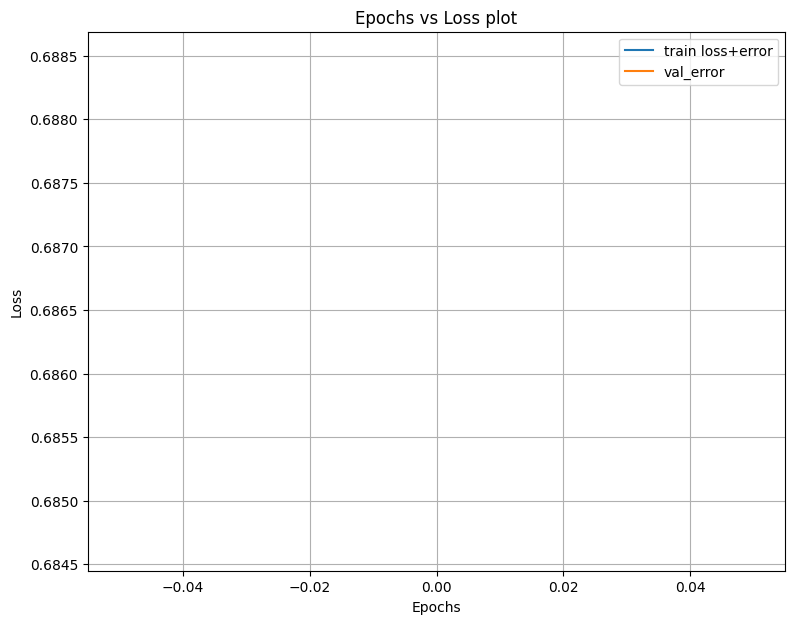

In [24]:
# Show loss curves 
plt.figure(figsize = (9,7))
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['loss'], label='train loss+error')
plt.plot(HIS.epoch, HIS.history['val_loss'], label='val_error')
plt.title("Epochs vs Loss plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

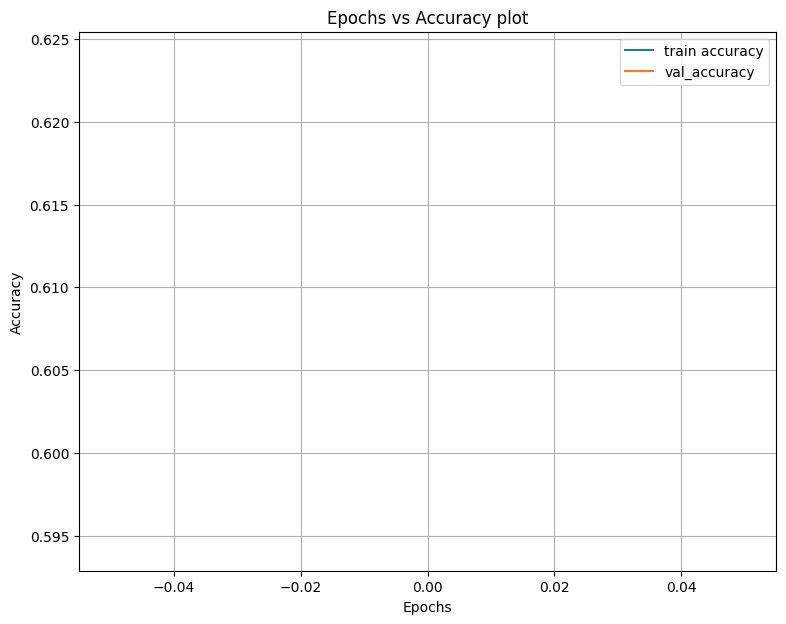

In [25]:
plt.figure(figsize = (9,7))
plt.title('Training performance')
plt.plot(HIS.epoch, HIS.history['accuracy'], label='train accuracy')
plt.plot(HIS.epoch, HIS.history['val_accuracy'], label='val_accuracy')
plt.title("Epochs vs Accuracy plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

In [26]:
# Plot confusion matrix
classes = ['noise','signal']
test_Y_hat = cnn.predict(X_test_final, batch_size=batch_size)

prediction = []
for i in range(len(test_Y_hat)):
    prediction.append(list(test_Y_hat[i]))
    
final_prediction = []
for j in range(len(prediction)):
    final_prediction.append(round(prediction[j][0]))

81/81 [==============================] - 9s 108ms/step


<Figure size 900x900 with 0 Axes>

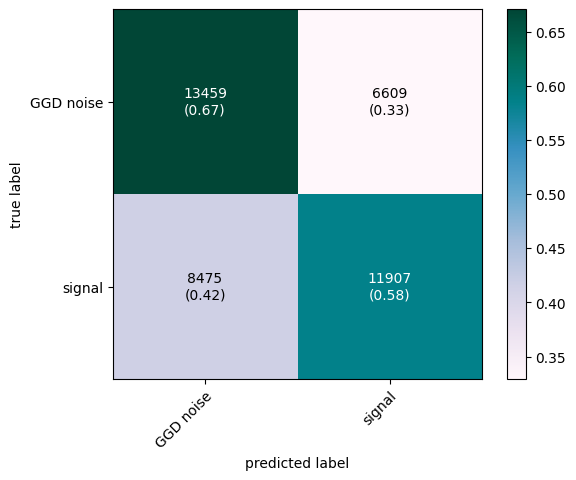

In [27]:
from mlxtend.plotting import plot_confusion_matrix
plt.figure(figsize = (9,9))
cm = confusion_matrix(y_test_final, final_prediction)
class_names = ['GGD noise','signal']
fig, ax = plot_confusion_matrix(conf_mat=cm, cmap = 'PuBuGn', class_names=class_names,colorbar=True, show_normed=True)
plt.show()

In [28]:
data_snr = df.loc[test_idx, :]
data_snr['prediction'] = final_prediction

data_snr = data_snr.reset_index()

In [29]:
snr = [-20, -16, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
final_acc = []
for i in range(len(snr)):
    correct = 0
    wrong = 0
    for k in range(len(data_snr)):
        if(data_snr['SNR'][k] == snr[i]):
            if(data_snr['labels'][k] == data_snr['prediction'][k]):
                correct += 1
            else:
                wrong += 1
    acc = correct/(correct+wrong)
    final_acc.append(acc)

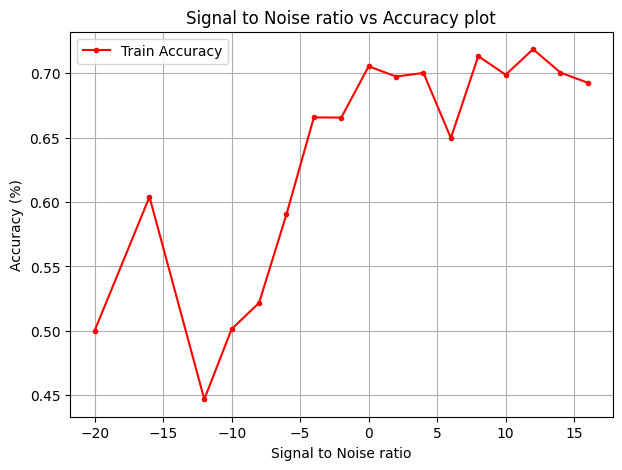

In [30]:
plt.figure(figsize = (7,5))
plt.plot(snr, final_acc, 'r', label = "Train Accuracy", marker = ".")
plt.title("Signal to Noise ratio vs Accuracy plot")
plt.xlabel("Signal to Noise ratio")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()

In [31]:
snr = [-20, -16, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
final_acc_cm = []
for i in range(len(snr)):
    correct_0 = 0
    wrong_0 = 0
    correct_1 = 0
    wrong_1 = 0
    for k in range(len(data_snr)):
        if(data_snr['SNR'][k] == snr[i]):
            if(data_snr['labels'][k] == data_snr['prediction'][k]):
                if(data_snr['labels'][k] == 0):
                    correct_0 += 1
                else:
                    correct_1 += 1
            else:
                if(data_snr['labels'][k] == 0):
                    wrong_0 += 1
                else:
                    wrong_1 += 1
    TP = correct_1/(correct_1 + wrong_0)
    TN = correct_0/(correct_0 + wrong_1)
    FP = wrong_1/(wrong_1 + correct_0)
    FN = wrong_0/(wrong_0 + correct_1)
    final_acc_cm.append([[TN,FN],[FP,TP]])

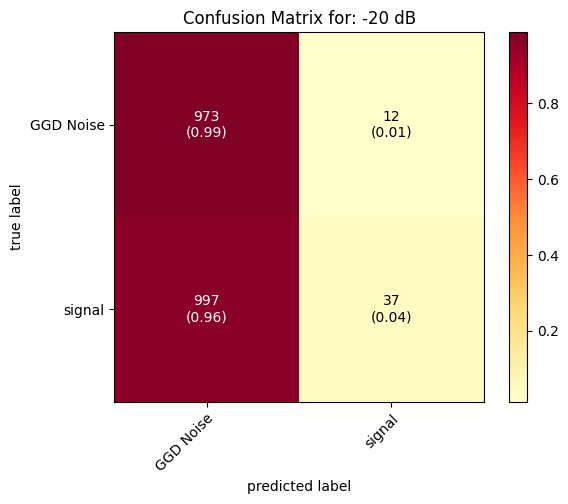

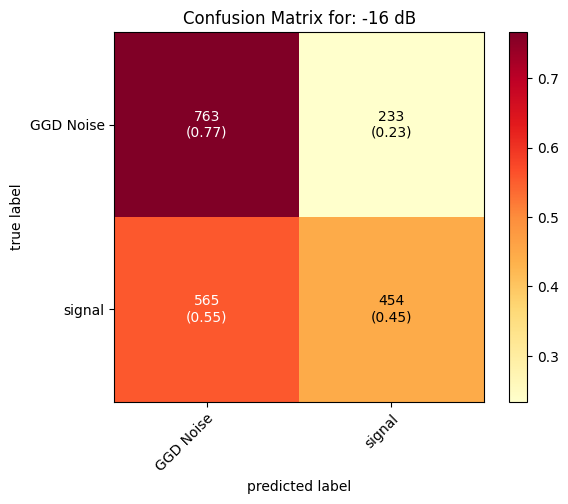

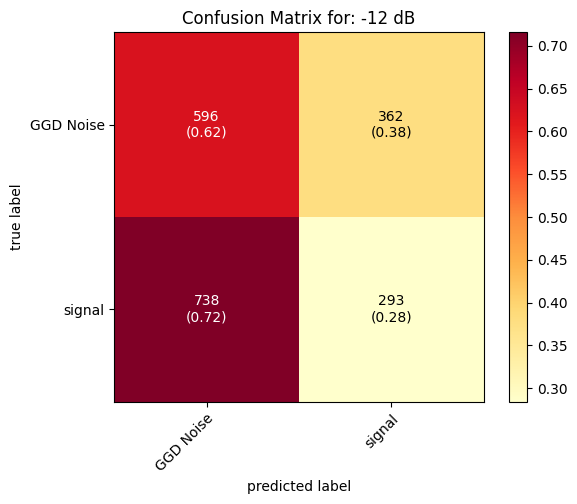

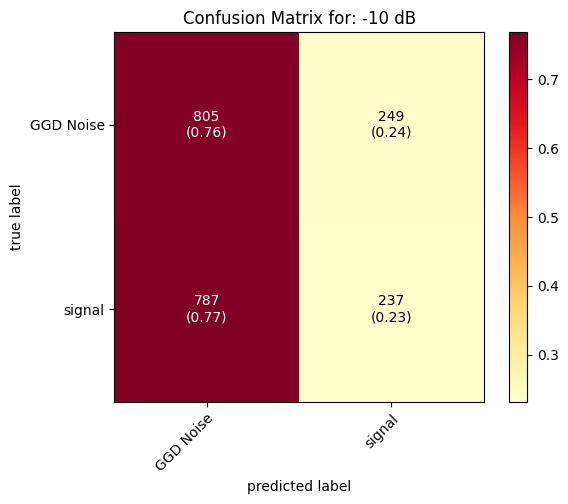

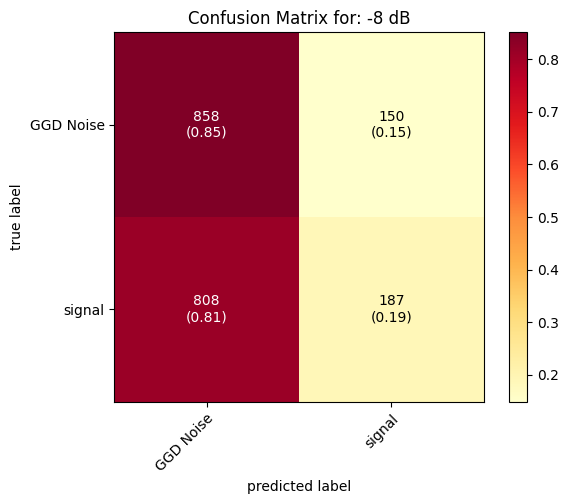

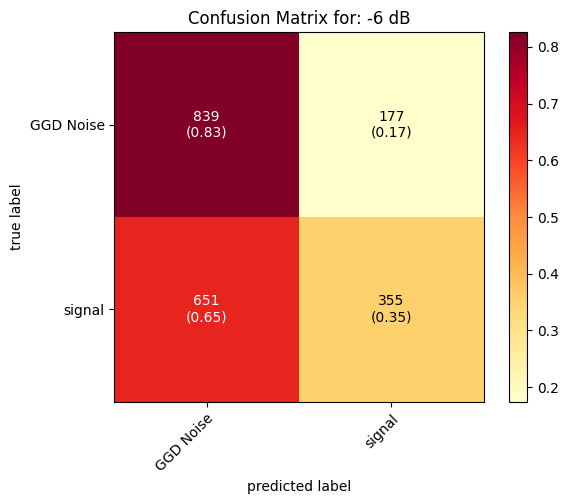

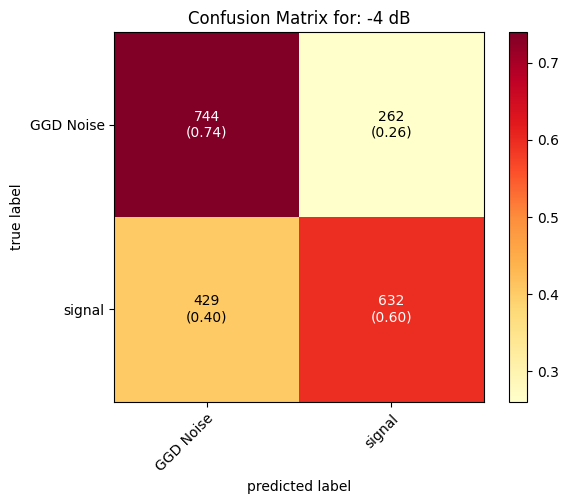

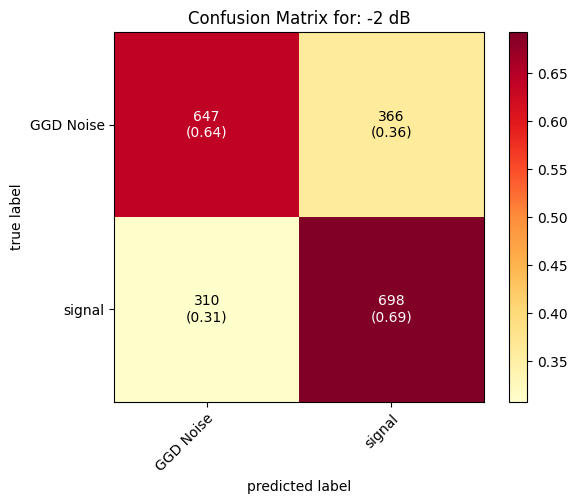

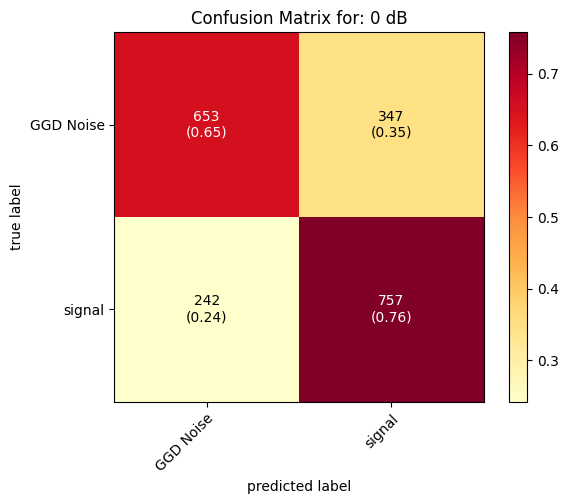

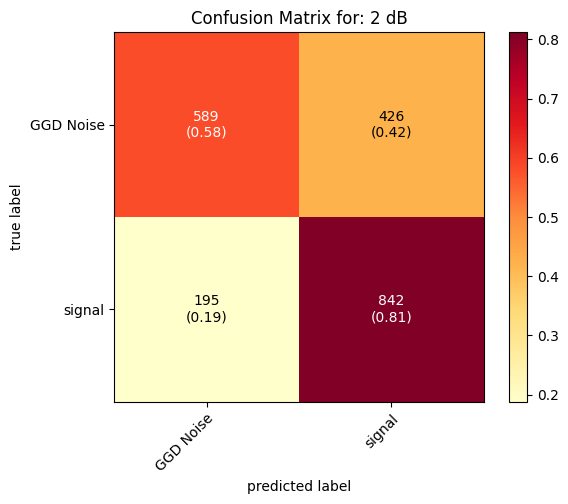

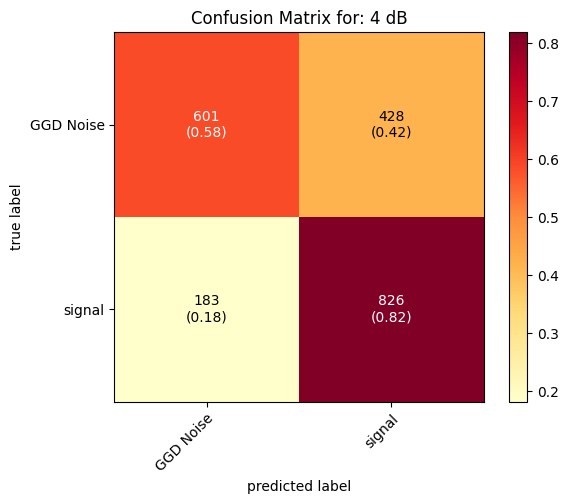

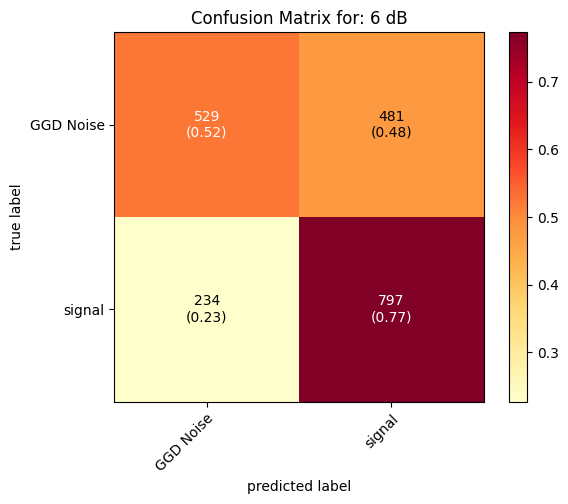

In [ ]:
snr = [-20, -16, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
for i in range(len(snr)):
    pred_cm = []
    true_cm = []
    for k in range(len(data_snr)):
        if(data_snr['SNR'][k] == snr[i]):
            pred_cm.append(data_snr['prediction'][k])
            true_cm.append(data_snr['labels'][k])
    cm = confusion_matrix(true_cm, pred_cm)
    class_names = ['GGD Noise','signal']
    fig, ax = plot_confusion_matrix(conf_mat=cm, cmap = 'YlOrRd', class_names=class_names,colorbar=True, show_normed=True)
    plt.title(f"Confusion Matrix for: {snr[i]} dB")
    plt.show()